# EDA for Slices

In [1]:
import numpy as np
import pandas as pd
import json
import matplotlib.pyplot as plt

In [2]:
!ls '../../data/slices.json'

../../data/slices.json


In [3]:
with open('../../data/slices.json') as f:
    slices = json.loads(f.read())

In [4]:
slices['0000']

{'coronal': 36, 'sagittal': 36, 'axial': 44}

In [5]:
coronal = { s: slices[s]['coronal'] for s in slices }

In [6]:
sagittal = { s: slices[s]['sagittal'] for s in slices }
axial = { s: slices[s]['axial'] for s in slices }

In [7]:
coronal_values = list(coronal.values())

In [8]:
sagittal_values = list(sagittal.values())
axial_values = list(axial.values())

In [9]:
dataframe = pd.DataFrame({ 'coronal': coronal_values, 'sagittal': sagittal_values, 'axial': axial_values })

In [10]:
dataframe.head()

,coronal,sagittal,axial
0,36,36,44
1,20,26,30
2,32,32,38
3,28,30,33
4,34,32,40


In [11]:
dataframe.describe()

,coronal,sagittal,axial
count,1130.000000,1130.000000,1130.000000
mean,29.777876,30.415929,34.316814
std,8.717150,6.962669,7.546172
min,17.000000,17.000000,19.000000
25%,21.000000,24.000000,28.000000
50%,30.000000,30.000000,35.000000
75%,36.000000,36.000000,40.000000
max,58.000000,51.000000,61.000000


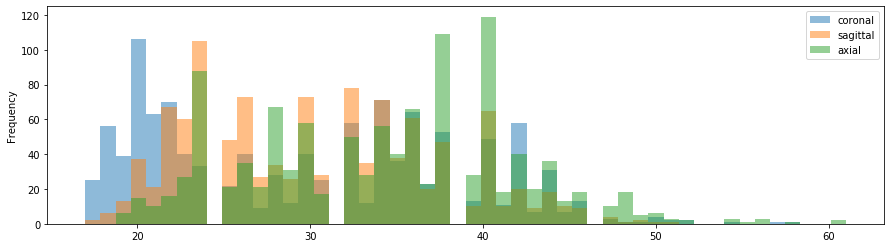

In [12]:
dataframe.plot.hist(bins=50, alpha=0.5, figsize=(15, 4))
plt.savefig('../../figures/slices_histogram.png', bbox_inches='tight')

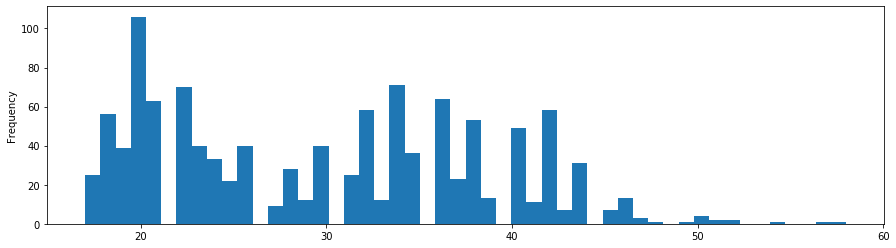

In [13]:
dataframe['coronal'].plot.hist(bins=50, figsize=(15, 4))

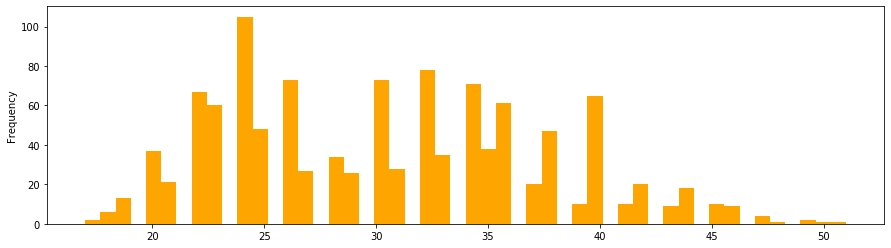

In [14]:
dataframe['sagittal'].plot.hist(bins=50, figsize=(15, 4), color='orange')

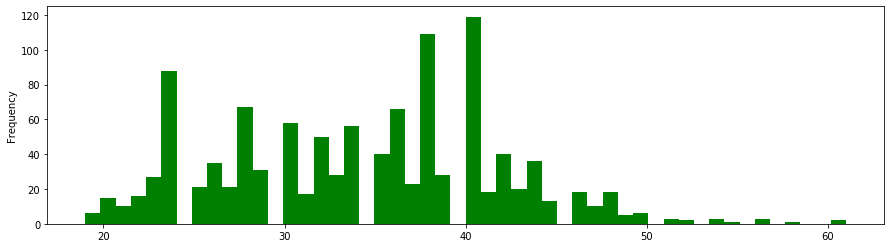

In [15]:
dataframe['axial'].plot.hist(bins=50, figsize=(15, 4), color='green')

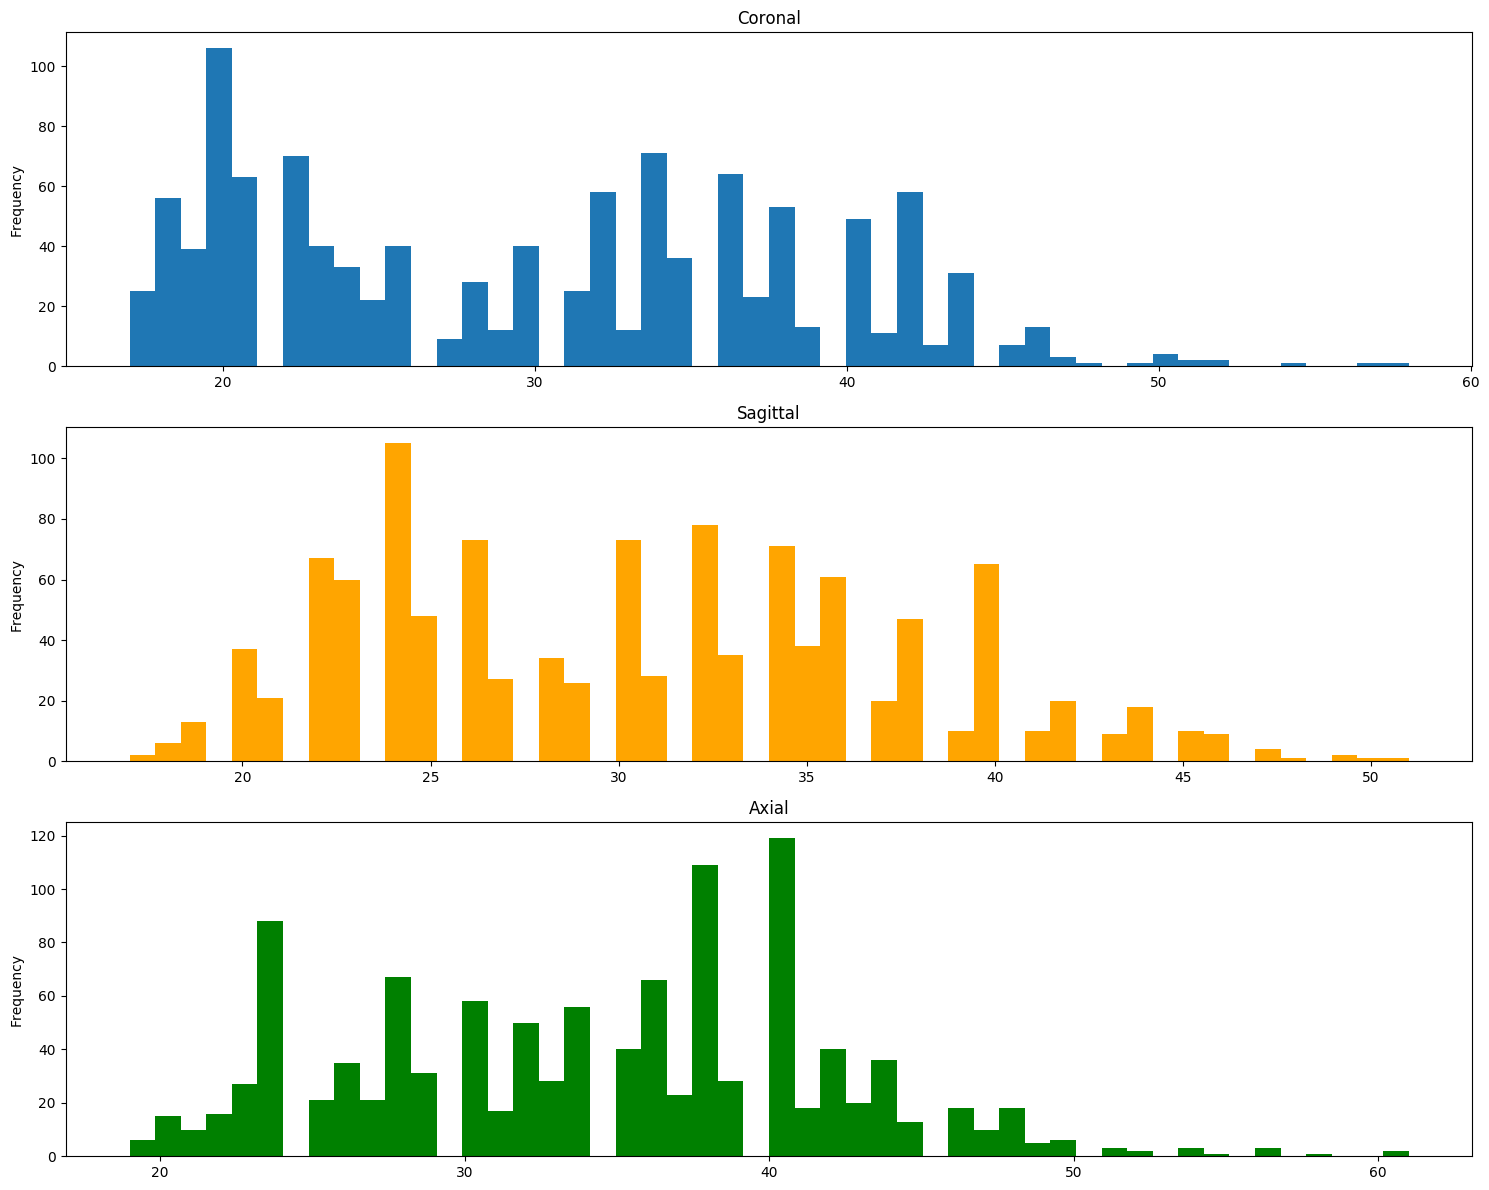

In [16]:
cols = 1
rows = 3

fig, axes = plt.subplots(nrows=rows, ncols=cols, figsize=(15, 12), dpi=100)
axes_flattened = axes.flatten()

dataframe['coronal'].plot.hist(bins=50, ax=axes_flattened[0])
axes_flattened[0].set_title('Coronal')

dataframe['sagittal'].plot.hist(bins=50, color='orange', ax=axes_flattened[1])
axes_flattened[1].set_title('Sagittal')

dataframe['axial'].plot.hist(bins=50, color='green', ax=axes_flattened[2])
axes_flattened[2].set_title('Axial')

fig.tight_layout()

plt.savefig('../../figures/slices_histogram_per_plane.png', bbox_inches='tight')

plt.show()